In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn import svm
from sklearn.datasets import make_blobs, make_circles
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from scipy.stats import multivariate_normal

# Question 1

## 1)

On one side we have $\xi_i \geq 0$ and on the other side $y_i\left(<w, \phi\left(x_i\right)>+w_0\right) \geq 1-\xi_i$, thus $ \xi_i \geq 1 - y_i\left(<w, \phi\left(x_i\right)>+w_0\right)$. Then:
$$
\xi_i \geq \max \left(0,1-y_i\left(<w, \phi\left(x_i\right)>+w_0\right)\right)
$$
Which is equivalent to:
$$
\xi_i \geq\left[1-y_i\left(<w, \phi\left(x_i\right)>+w_0\right)\right]_{+}
$$
Therefore, we can rewrite the original optimization, with no loss of generality, as:
$$
\operatorname{argmin}_{\mathbf{w} \in \mathcal{H}, w_0 \in \mathbb{R}}\left(\frac{1}{2}\|\mathbf{w}\|^2+C \sum_{i=1}^n\left[1-y_i\left(\left\langle\mathbf{w}, \Phi\left(\mathbf{x}_i\right)\right\rangle+w_0\right)\right]_{+}\right)
$$

## 2)

The classification error is calculated using Hinge loss: 
$$
\left[1-y_i\left(<w, \phi\left(x_i\right)>+w_0\right)\right]_{+}
$$

What SVM does is minimizing this error while using Hinge loss that fortunately is convex, this is good as we can use usual algorithms for finding the minimizer. This was not the case with the loss of binary classification, the 0-1 loss which is not convex, thus we cannot work with it as easily as before.

The hinge loss penalizes heavily bad missclassifications, but it also penalizes a bit the points that are correctly classified with penalization values between 0 and 1.

# Linear SVM

### 3)

In [2]:
std_dev = np.array([1,1])
X, y, centers = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0 , return_centers=True, cluster_std=std_dev)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


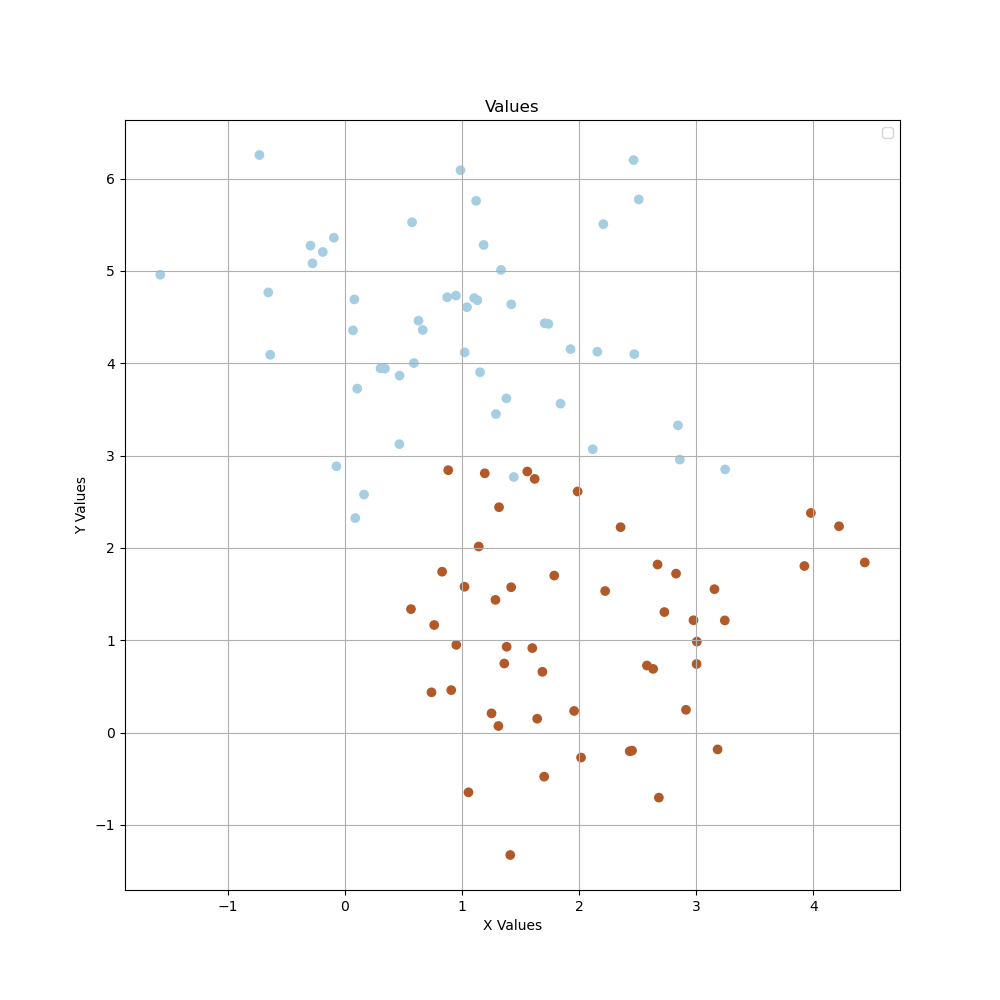

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1] ,c=y , cmap=plt.cm.Paired)
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Values")
ax.legend()
plt.grid()
plt.show()

### 4) Since the probability distributions are known, numerically estimate the Bayes risk.

In [4]:
# Bayes classifier
def h_bayes(X):

    px_y1 = multivariate_normal.pdf(X , mean=centers[0], cov=std_dev[0]**2 )
    px_y0 = multivariate_normal.pdf(X , mean=centers[1], cov=std_dev[1]**2 )

    # Using bayes rule
    py1_x = px_y1*0.5 / (px_y0*0.5 + px_y1*0.5)
    h_bayes = 1*(py1_x >= 0.5 )

    
    return h_bayes

# Bayesian risk
def bayes_risk(X, y):
    pred = h_bayes(X)

    #0-1 loss
    loss = 1*(pred == y)

    return np.mean(loss)

In [5]:
risk = bayes_risk(X, y)
print("Bayes risk = %s" %risk)

Bayes risk = 0.06


In [6]:
penalty = 0.1

clf = svm.SVC(kernel="linear", C=penalty)
clf.fit(X,y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin



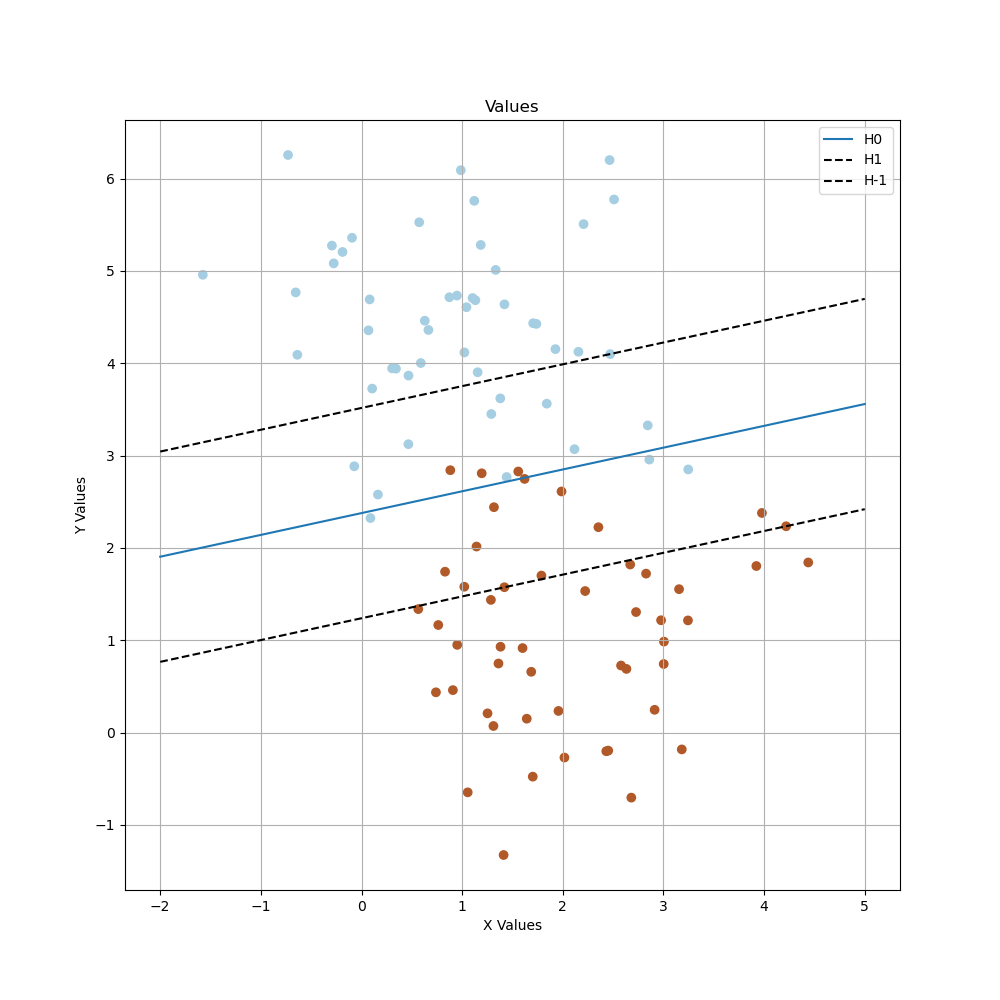

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1] ,c=y , cmap=plt.cm.Paired)
plt.plot(xx, yy, label="H0")
plt.plot(xx, yy_down, 'k--' ,label="H1")
plt.plot(xx, yy_up, 'k--', label="H-1")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Values")
ax.legend()
plt.grid()
plt.show()